## **Logistic Regression**

Logistic regression is a statistical method used for binary classification problems, where the outcome variable $y$ can take only two possible types: $0$ or $1$. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input $X$ belongs to a particular category.

The logistic regression model estimates the probability $P(y=1|X)$ using the logistic (sigmoid) function:

$$
P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ and $\sigma(z)$ is the sigmoid function.

The model parameters $\beta$ are estimated by maximizing the likelihood function, or equivalently, minimizing the negative log-likelihood (cross-entropy loss):

$$
L(\beta) = -\sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

where $\hat{y}^{(i)} = P(y=1|X^{(i)})$.

**Algorithm Steps:**
1. Initialize the weights $\beta$.
2. For each iteration:
    - Compute $z = X\beta$
    - Apply the sigmoid function: $\hat{y} = \sigma(z)$
    - Compute the loss $L(\beta)$
    - Update the weights using gradient descent:
      $$
      \beta := \beta - \alpha \frac{\partial L}{\partial \beta}
      $$
      where $\alpha$ is the learning rate.
3. Repeat until convergence.

Logistic regression is widely used for its simplicity, interpretability, and efficiency in binary classification tasks.

## Binary classification

In [772]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [773]:
from sklearn.datasets import fetch_openml

In [774]:
data = fetch_openml('titanic', version=1, as_frame = True)

In [775]:
df = data['data']

In [776]:
df['survived'] = data['target']

In [777]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [778]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [780]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [781]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<Axes: xlabel='survived', ylabel='count'>

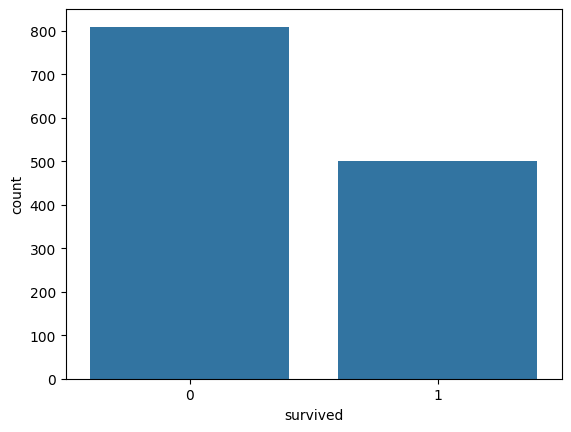

In [782]:
sns.countplot(x='survived', data= df)

<Axes: xlabel='survived', ylabel='count'>

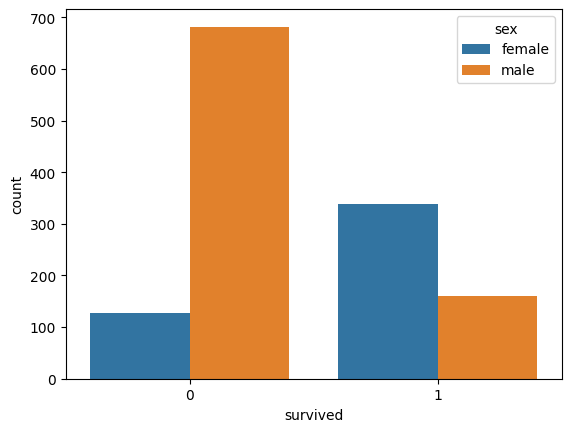

In [783]:
sns.countplot(x='survived', data= df, hue='sex')

<Axes: xlabel='survived', ylabel='count'>

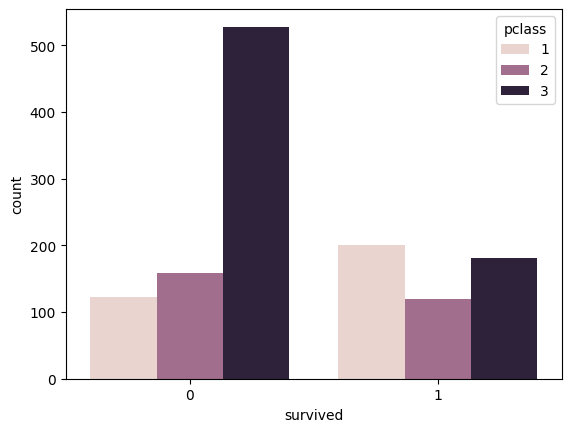

In [784]:
sns.countplot(x='survived', data= df, hue='pclass')

<Axes: ylabel='Frequency'>

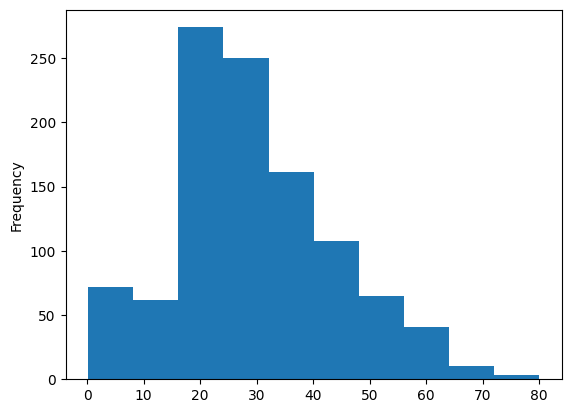

In [785]:
df['age'].plot.hist()

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [787]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [788]:
missing_df = pd.DataFrame(df.isnull().sum()/len(df)*100)

<Axes: title={'center': 'missing values in %'}, ylabel='percentage'>

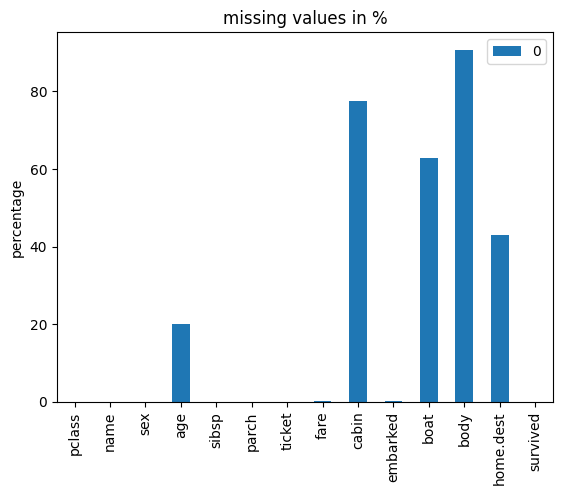

In [789]:
missing_df.plot(kind='bar', title='missing values in %', ylabel='percentage')

<Axes: title={'center': 'Passenger Travelled Alone?'}, xlabel='travelled_alone'>

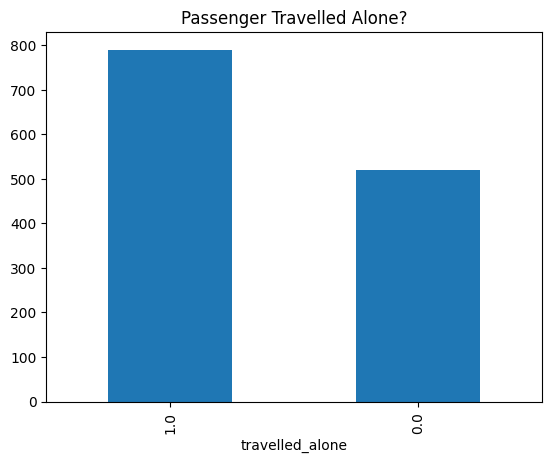

In [790]:
df['family'] = df['sibsp']+ df['parch']
df.loc[df['family']>0, 'travelled_alone'] = 0
df.loc[df['family']==0, 'travelled_alone'] = 1
df['travelled_alone'].value_counts().plot(title='Passenger Travelled Alone?', kind = 'bar')

In [791]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [792]:
df.drop(['sibsp','parch'],axis=1, inplace=True)

In [793]:
df

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


<Axes: xlabel='travelled_alone', ylabel='count'>

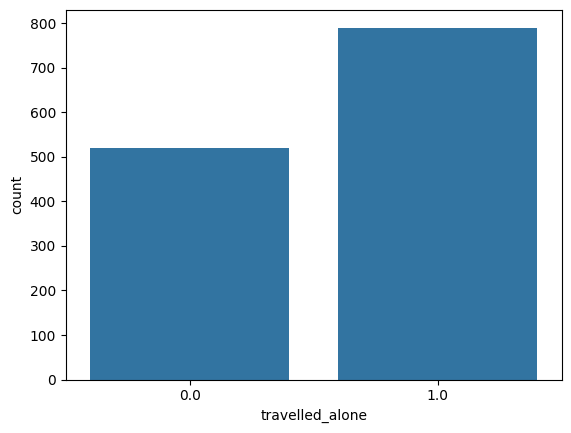

In [794]:
sns.countplot(x='travelled_alone',data=df)

In [795]:
df.drop(['name','ticket','home.dest','cabin','body','boat'], axis=1, inplace=True)

In [796]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [797]:
## One Hot Encoding

sex = pd.get_dummies(df['sex'],drop_first = True).astype('float64')
sex

,male
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1304,0.0
1305,0.0
1306,1.0
1307,1.0


In [798]:
df.drop(['sex'],inplace=True, axis=1)
df = pd.concat([df,sex],axis=1)

In [799]:
df.isnull().sum()

pclass               0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
male                 0
dtype: int64

In [800]:
from sklearn.impute import SimpleImputer

In [801]:
mean_imputer = SimpleImputer(strategy = 'mean')

In [802]:
df['age'] = mean_imputer.fit_transform(df[['age']])
df['fare'] = mean_imputer.fit_transform(df[['age']])

In [803]:
df.isnull().sum()

pclass             0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_alone    0
male               0
dtype: int64

In [804]:
df.value_counts()

pclass  age        fare       embarked  survived  family  travelled_alone  male
3       29.881135  29.881135  S         0         0       1.0              1.0     56
                              Q         0         0       1.0              1.0     26
                              C         0         0       1.0              1.0     22
                              Q         1         0       1.0              0.0     19
1       29.881135  29.881135  S         0         0       1.0              1.0     15
                                                                                   ..
2       22.000000  22.000000  C         1         3       0.0              0.0      1
                              S         0         0       1.0              0.0      1
                                                  2       0.0              1.0      1
                                        1         0       1.0              0.0      1
3       74.000000  74.000000  S         0         0       1.

In [805]:
freq_imputer = SimpleImputer(strategy='most_frequent')

In [806]:
df['embarked'] = freq_imputer.fit_transform(df[['embarked']]).ravel()

In [807]:
df

,pclass,age,fare,embarked,survived,family,travelled_alone,male
0,1,29.000000,29.000000,S,1,0,1.0,0.0
1,1,0.916700,0.916700,S,1,3,0.0,1.0
2,1,2.000000,2.000000,S,0,3,0.0,0.0
3,1,30.000000,30.000000,S,0,3,0.0,1.0
4,1,25.000000,25.000000,S,0,3,0.0,0.0
...,...,...,...,...,...,...,...,...
1304,3,14.500000,14.500000,C,0,1,0.0,0.0
1305,3,29.881135,29.881135,C,0,1,0.0,0.0
1306,3,26.500000,26.500000,C,0,0,1.0,1.0
1307,3,27.000000,27.000000,C,0,0,1.0,1.0


In [808]:
df.isnull().sum()

pclass             0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_alone    0
male               0
dtype: int64

In [809]:
df.head(20)

,pclass,age,fare,embarked,survived,family,travelled_alone,male
0,1,29.000000,29.000000,S,1,0,1.0,0.0
1,1,0.916700,0.916700,S,1,3,0.0,1.0
2,1,2.000000,2.000000,S,0,3,0.0,0.0
3,1,30.000000,30.000000,S,0,3,0.0,1.0
4,1,25.000000,25.000000,S,0,3,0.0,0.0
5,1,48.000000,48.000000,S,1,0,1.0,1.0
6,1,63.000000,63.000000,S,1,1,0.0,0.0
7,1,39.000000,39.000000,S,0,0,1.0,1.0
8,1,53.000000,53.000000,S,1,2,0.0,0.0
9,1,71.000000,71.000000,C,0,0,1.0,1.0


In [810]:
embark = pd.get_dummies(df['embarked'], drop_first=True).astype('float64')
embark

,Q,S
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1304,0.0,0.0
1305,0.0,0.0
1306,0.0,0.0
1307,0.0,0.0


In [811]:
df.drop(['embarked'], axis=1, inplace=True)

In [812]:
df

,pclass,age,fare,survived,family,travelled_alone,male
0,1,29.000000,29.000000,1,0,1.0,0.0
1,1,0.916700,0.916700,1,3,0.0,1.0
2,1,2.000000,2.000000,0,3,0.0,0.0
3,1,30.000000,30.000000,0,3,0.0,1.0
4,1,25.000000,25.000000,0,3,0.0,0.0
...,...,...,...,...,...,...,...
1304,3,14.500000,14.500000,0,1,0.0,0.0
1305,3,29.881135,29.881135,0,1,0.0,0.0
1306,3,26.500000,26.500000,0,0,1.0,1.0
1307,3,27.000000,27.000000,0,0,1.0,1.0


In [813]:
df = pd.concat([df, embark], axis=1)
df

,pclass,age,fare,survived,family,travelled_alone,male,Q,S
0,1,29.000000,29.000000,1,0,1.0,0.0,0.0,1.0
1,1,0.916700,0.916700,1,3,0.0,1.0,0.0,1.0
2,1,2.000000,2.000000,0,3,0.0,0.0,0.0,1.0
3,1,30.000000,30.000000,0,3,0.0,1.0,0.0,1.0
4,1,25.000000,25.000000,0,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,14.500000,0,1,0.0,0.0,0.0,0.0
1305,3,29.881135,29.881135,0,1,0.0,0.0,0.0,0.0
1306,3,26.500000,26.500000,0,0,1.0,1.0,0.0,0.0
1307,3,27.000000,27.000000,0,0,1.0,1.0,0.0,0.0


In [814]:
X = df.drop(['survived'],axis=1)

In [815]:
y = df['survived']

In [816]:
X,y

(      pclass        age       fare  family  travelled_alone  male    Q    S
 0          1  29.000000  29.000000       0              1.0   0.0  0.0  1.0
 1          1   0.916700   0.916700       3              0.0   1.0  0.0  1.0
 2          1   2.000000   2.000000       3              0.0   0.0  0.0  1.0
 3          1  30.000000  30.000000       3              0.0   1.0  0.0  1.0
 4          1  25.000000  25.000000       3              0.0   0.0  0.0  1.0
 ...      ...        ...        ...     ...              ...   ...  ...  ...
 1304       3  14.500000  14.500000       1              0.0   0.0  0.0  0.0
 1305       3  29.881135  29.881135       1              0.0   0.0  0.0  0.0
 1306       3  26.500000  26.500000       0              1.0   1.0  0.0  0.0
 1307       3  27.000000  27.000000       0              1.0   1.0  0.0  0.0
 1308       3  29.000000  29.000000       0              1.0   1.0  0.0  1.0
 
 [1309 rows x 8 columns],
 0       1
 1       1
 2       0
 3       0
 4  

In [817]:
from sklearn.model_selection import train_test_split

In [818]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [819]:
X_train

,pclass,age,fare,family,travelled_alone,male,Q,S
306,1,54.000000,54.000000,1,0.0,1.0,0.0,1.0
527,2,28.000000,28.000000,0,1.0,1.0,0.0,1.0
992,3,30.500000,30.500000,0,1.0,0.0,1.0,0.0
1152,3,50.000000,50.000000,1,0.0,1.0,0.0,1.0
1059,3,28.000000,28.000000,0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
715,3,29.000000,29.000000,0,1.0,1.0,0.0,1.0
905,3,32.000000,32.000000,0,1.0,1.0,0.0,1.0
1096,3,2.000000,2.000000,4,0.0,1.0,0.0,1.0
235,1,29.881135,29.881135,0,1.0,1.0,0.0,1.0


In [820]:
from sklearn.linear_model import LogisticRegression

In [821]:
model = LogisticRegression()

In [822]:
model.fit(X_train,y_train)


LogisticRegression()

In [823]:
y_pred = model.predict(X_test)

In [824]:
y_pred

array(['0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1

In [825]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [826]:
accuracy_score(y_test,y_pred)

0.8015267175572519

In [827]:
confusion_matrix(y_test,y_pred)

array([[205,  31],
       [ 47, 110]])